# Simple viewer for Grads files

In [1]:
%matplotlib inline

import ipywidgets as widgets
from ipyfilechooser import FileChooser

from read_grads import read_metadata, read_data
from widget_selection import result_and_time_options, altitude_options
from grads_plot import grads_plot

## Select a grads control file (.ctl) by clicking on the 'Select' button

Note that the .ctl and the .grd files must be in the same directory.

Test files can be found in the ```data``` directory.

In [2]:
# Create and display a FileChooser widget
# fc = FileChooser('D:\sbranchett\My Documents\Jupyter_GrADS\data')
fc = FileChooser('.')
display(fc)

FileChooser(path='.', filename='', show_hidden='False')

In [3]:
filename = "data/attm101.ctl"
ctl_file = fc.selected
if ctl_file == None:
    print('!!! PLEASE SELECT A CONTROL FILE !!!')
else:
    filename = ctl_file
print('Selected control file is',filename)

!!! PLEASE SELECT A CONTROL FILE !!!
Selected control file is data/attm101.ctl


## Extract the metadata, find the results file and extract the data

In [4]:
metadata, varsKeys = read_metadata(filename)

grads_filename = filename[:-4]+"_"+metadata["TDEF"][0][-4:]+".grd"
print('Name of grads file is:',grads_filename)

data = read_data(metadata, varsKeys, grads_filename)

Name of grads file is: data/attm101_2000.grd


# Select data to plot

### Choose result type and time step

In [5]:
time_widget, result_widget = result_and_time_options(metadata, varsKeys)

display(time_widget)
display(result_widget)

Dropdown(description='Date stamp:', options=(('1jan2000', 0), ('1jan2000+1mo', 1), ('1jan2000+1mo+1mo', 2)), v…

Dropdown(description='Result type:', options=(('GH:  geopotential height [m]', 0), ('TEMP:  abs. temperature […

### Choose altitude if necessary

In [6]:
time_step = time_widget.value

result_index = result_widget.value
result_type = varsKeys[result_index][0]
result_zeds = varsKeys[result_index][1]

if result_zeds != 0:
    altitude_widget = altitude_options(metadata)
    display(altitude_widget)

Dropdown(description='Altitude:', options=((925.0, 0), (850.0, 1), (700.0, 2), (500.0, 3), (300.0, 4), (200.0,…

## Plot data

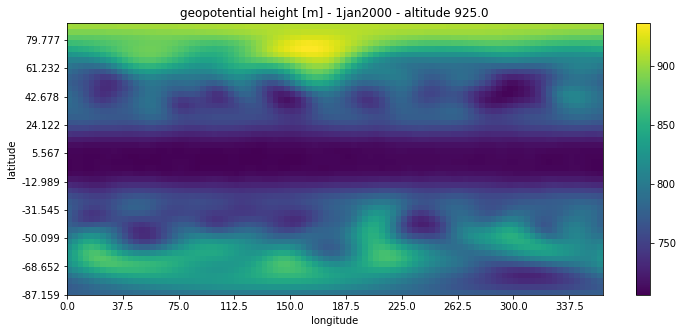

In [7]:
altitude_step = 0
if result_zeds != 0:
    altitude_step = altitude_widget.value

grads_plot(metadata, data, result_zeds, time_step, result_type, altitude_step).show()